# Detecção de texto em imagens com EAST detector

- Paper da técnica: https://arxiv.org/pdf/1704.03155v2.pdf

# Importando as bibliotecas

In [10]:
import cv2
import numpy as np
from imutils.object_detection import non_max_suppression
from matplotlib import pyplot as plt
import pytesseract

%matplotlib inline


# Processando a imagem

In [3]:
detector = 'frozen_east_text_detection.pb'
largura, altura = 320, 320

In [20]:
imagem = 'content/caneca.jpg'
min_confianca = 0.9 #@param {type: 'number', min:0.0, max:1.0}

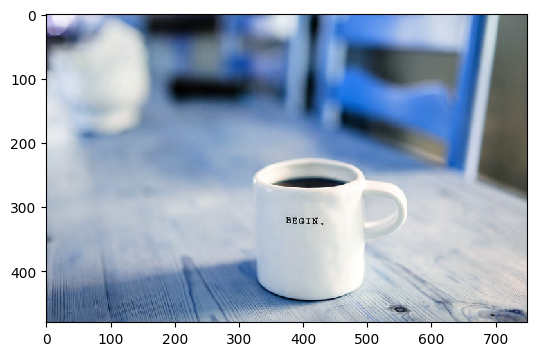

In [21]:
img = cv2.imread(imagem)
plt.figure(figsize = (20,4))
plt.imshow(img, interpolation='nearest')

In [22]:
original = img.copy()

In [23]:
img.shape

(480, 750, 3)

In [24]:
H = img.shape[0]
W = img.shape[1]
print(H, W)

480 750


In [25]:
proporcao_W = W / float(largura)
proporcao_H = H / float(altura)
print(proporcao_W, proporcao_H)

2.34375 1.5


In [ ]:
img = cv2.resize(img, (largura, altura))
H = img.shape[0]
W = img.shape[1]
print(H, W)

320 320


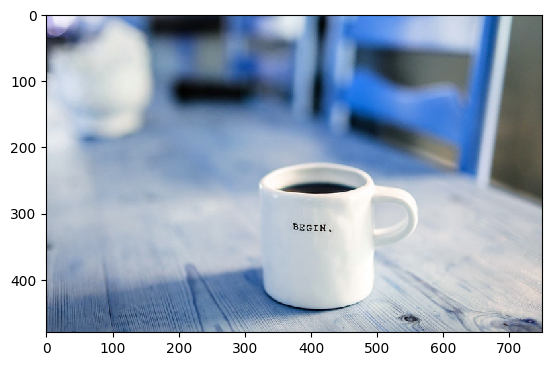

In [26]:
plt.imshow(img, interpolation='nearest')

# Carregando a rede neural

In [27]:
nomes_camadas = ['feature_fusion/Conv_7/Sigmoid', 'feature_fusion/concat_3']

In [28]:
rede_neural = cv2.dnn.readNet(detector)

error: OpenCV(4.5.4) /tmp/pip-req-build-khv2fx3p/opencv/modules/dnn/src/caffe/caffe_io.cpp:1138: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "frozen_east_text_detection.pb" in function 'ReadProtoFromBinaryFile'


In [ ]:
img.shape

(320, 320, 3)

In [ ]:
blob = cv2.dnn.blobFromImage(img, 1.0, (W, H), swapRB = True, crop = False)

In [ ]:
blob.shape # batch_size

(1, 3, 320, 320)

In [ ]:
rede_neural.setInput(blob)
scores, geometry = rede_neural.forward(nomes_camadas)

In [ ]:
scores

array([[[[1.47752374e-07, 5.33552679e-07, 6.18313038e-07, ...,
          2.38874441e-06, 2.14221203e-07, 1.97413760e-06],
         [2.21553137e-07, 8.22969994e-08, 1.52692380e-07, ...,
          3.80215579e-06, 2.49685854e-07, 2.09746190e-06],
         [2.41076435e-07, 2.56505132e-07, 6.74969783e-07, ...,
          4.48429728e-06, 6.08908124e-08, 2.51588767e-06],
         ...,
         [5.19031346e-07, 1.34708145e-07, 3.80787064e-08, ...,
          1.79544452e-06, 7.75353328e-07, 5.47008494e-06],
         [2.85663532e-07, 8.55804032e-08, 1.12898597e-07, ...,
          1.13547708e-06, 9.01572434e-07, 5.07820823e-06],
         [7.21993842e-08, 8.43333137e-09, 5.46042234e-09, ...,
          1.91421819e-07, 3.16591752e-07, 1.02402886e-07]]]],
      dtype=float32)

In [ ]:
geometry

array([[[[ 1.54848892e+02,  1.01938652e+02,  1.08211067e+02, ...,
           1.33965744e+02,  1.27577377e+02,  1.46967911e+02],
         [ 1.19407845e+02,  6.46942062e+01,  7.18581467e+01, ...,
           9.02676239e+01,  8.52865753e+01,  1.03320236e+02],
         [ 1.22548698e+02,  6.90612106e+01,  7.86800232e+01, ...,
           1.06370026e+02,  1.01670258e+02,  1.14973625e+02],
         ...,
         [ 1.16457443e+02,  4.99968452e+01,  3.75178909e+01, ...,
           8.21259766e+01,  8.12639771e+01,  1.21695587e+02],
         [ 1.27623566e+02,  5.88201637e+01,  4.84035950e+01, ...,
           8.31772385e+01,  8.09339981e+01,  1.11183853e+02],
         [ 1.26661636e+02,  7.53631363e+01,  6.93250504e+01, ...,
           1.27025375e+02,  1.18697914e+02,  1.47223694e+02]],

        [[ 1.09559792e+02,  9.52129364e+01,  9.08699570e+01, ...,
           1.00495560e+02,  9.43882065e+01,  1.12618568e+02],
         [ 8.27181702e+01,  5.77867126e+01,  5.62353210e+01, ...,
           6.53349457e

In [ ]:
geometry[0,0,0]

array([154.84889 , 101.93865 , 108.21107 , 110.35274 , 111.579956,
       113.072136, 114.39854 , 116.1475  , 115.30822 , 115.90365 ,
       117.415665, 118.78156 , 116.545105, 116.34599 , 121.44332 ,
       129.47726 , 137.6081  , 143.0237  , 146.83202 , 149.02911 ,
       149.08717 , 148.28294 , 147.13005 , 145.16948 , 143.0738  ,
       140.95238 , 138.77005 , 137.29416 , 134.19766 , 131.39839 ,
       129.34814 , 127.54952 , 126.742744, 125.23263 , 120.42206 ,
       117.427246, 116.22169 , 116.099655, 116.90419 , 118.21091 ,
       119.18678 , 123.20284 , 125.41776 , 126.38552 , 126.154854,
       126.193016, 126.85884 , 126.92803 , 128.2181  , 128.52025 ,
       128.97598 , 129.4047  , 130.30916 , 130.73273 , 130.80652 ,
       130.30147 , 129.32219 , 127.84744 , 126.37807 , 125.062874,
       124.11794 , 123.375946, 122.265175, 120.8582  , 120.00341 ,
       119.063995, 117.834236, 116.99429 , 115.744   , 117.560776,
       119.882645, 121.395935, 125.46858 , 121.87925 , 120.994

In [ ]:
scores.shape

(1, 1, 80, 80)

In [ ]:
scores.shape[2:4]

(80, 80)

In [ ]:
linhas, colunas = scores.shape[2:4]

In [ ]:
print(linhas, colunas)

80 80


In [ ]:
caixas = []
confiancas = []

# Decodificando os valores

- Explicação sobre os [valores de geometria](https://stackoverflow.com/questions/55583306/decoding-geometry-output-of-east-text-detection)

In [ ]:
def dados_geometricos(geometry, y):
  xData0 = geometry[0, 0, y]
  xData1 = geometry[0, 1, y]
  xData2 = geometry[0, 2, y]
  xData3 = geometry[0, 3, y]
  data_angulos = geometry[0, 4, y]
  return data_angulos, xData0, xData1, xData2, xData3

In [ ]:
def calculos_geometria(data_angulos, xData0, xData1, xData2, xData3):
  (offsetX, offsetY) = (x * 4.0, y * 4.0)
  angulo = data_angulos[x]
  cos = np.cos(angulo)
  sin = np.sin(angulo)
  h = xData0[x] + xData2[x]
  w = xData1[x] + xData3[x]

  fimX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
  fimY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
  
  inicioX = int(fimX - w)
  inicioY = int(fimY - h)

  return inicioX, inicioY, fimX, fimY

In [ ]:
linhas, colunas

(80, 80)

In [ ]:
scores[0, 0, 0]

array([1.47752374e-07, 5.33552679e-07, 6.18313038e-07, 5.44988495e-07,
       6.83899884e-07, 6.35390847e-07, 2.87392936e-07, 1.17966316e-07,
       1.41452034e-07, 1.98707312e-07, 1.92506320e-07, 1.78495881e-07,
       3.21175833e-07, 1.10004373e-06, 1.85389433e-06, 7.20500395e-07,
       2.26942120e-07, 1.93052713e-07, 2.77832100e-07, 4.64349341e-07,
       5.43345493e-07, 6.31639011e-07, 6.57134535e-07, 6.78435356e-07,
       6.93763980e-07, 5.52085112e-07, 4.24791835e-07, 3.10167337e-07,
       4.78031438e-07, 4.52927878e-07, 5.14709882e-07, 5.01000329e-07,
       3.54018198e-07, 4.92441586e-07, 2.26114366e-06, 3.20661206e-06,
       2.21842652e-06, 1.91733261e-06, 1.95528651e-06, 2.52953100e-06,
       3.17436297e-06, 2.37437212e-06, 3.73728085e-07, 5.99255259e-08,
       7.66571731e-08, 1.31929426e-07, 1.90021836e-07, 3.26953739e-07,
       1.99290312e-07, 1.49426484e-07, 2.11751313e-07, 2.15443109e-07,
       2.36163473e-07, 3.09929874e-07, 3.78356759e-07, 4.72775469e-07,
      

In [ ]:
for y in range(0, linhas):
  #print(y)
  data_scores = scores[0, 0, y]

  data_angulos, xData0, xData1, xData2, xData3 = dados_geometricos(geometry, y)

  for x in range(0, colunas):
    if data_scores[x] < min_confianca:
      continue
    
    inicioX, inicioY, fimX, fimY = calculos_geometria(data_angulos, xData0, xData1, xData2, xData3)
    confiancas.append(data_scores[x])
    caixas.append((inicioX, inicioY, fimX, fimY))

In [ ]:
confiancas

[0.9995617,
 0.99982554,
 0.9997718,
 0.9994678,
 0.9662514,
 0.96421045,
 0.9993309,
 0.99968016,
 0.99951243]

In [ ]:
caixas

[(156, 208, 190, 220),
 (157, 208, 187, 220),
 (157, 208, 186, 220),
 (158, 207, 186, 220),
 (156, 207, 187, 221),
 (157, 207, 188, 220),
 (158, 208, 187, 221),
 (158, 208, 187, 221),
 (157, 208, 188, 221)]

In [ ]:
deteccoes = non_max_suppression(np.array(caixas), probs=confiancas)

In [ ]:
deteccoes

array([[157, 208, 187, 220]])

In [ ]:
proporcao_H, proporcao_W

(1.5, 2.34375)

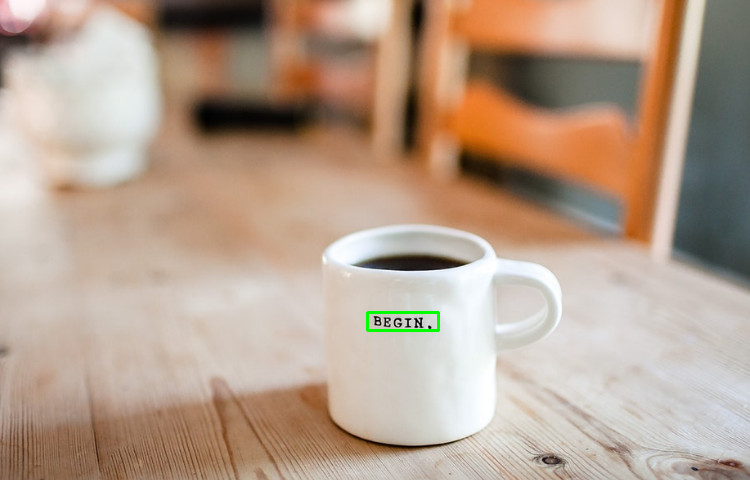

In [ ]:
copia = original.copy()
for (inicioX, inicioY, fimX, fimY) in deteccoes:
  #print(inicioX, inicioY, fimX, fimY)
  inicioX = int(inicioX * proporcao_W)
  inicioY = int(inicioY * proporcao_H)
  fimX = int(fimX * proporcao_W)
  fimY = int(fimY * proporcao_H)

  # region of interest
  roi = copia[inicioY:fimY, inicioX:fimX]

  cv2.rectangle(original, (inicioX, inicioY), (fimX, fimY), (0,255,0), 2)
cv2_imshow(original)

In [ ]:
cv2_imshow(roi)

In [ ]:
roi = cv2.resize(roi, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

In [ ]:
cv2_imshow(roi)

# Reconhecimento do texto

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 7"

BEGIN,



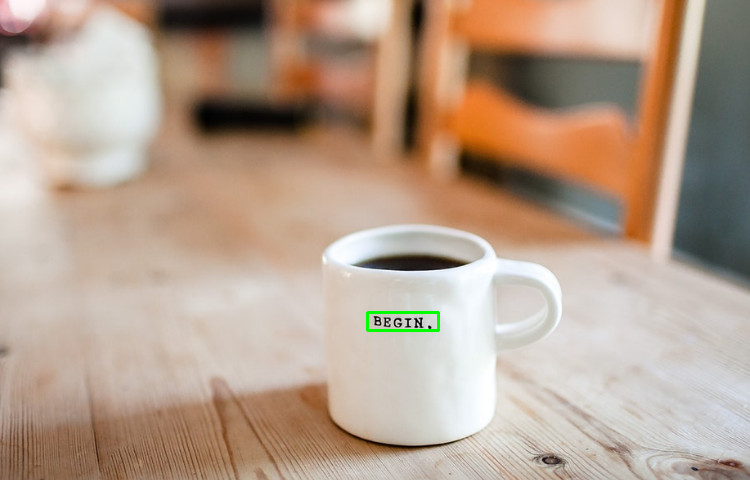

In [ ]:
copia = original.copy()
for (inicioX, inicioY, fimX, fimY) in deteccoes:
  inicioX = int(inicioX * proporcao_W)
  inicioY = int(inicioY * proporcao_H)
  fimX = int(fimX * proporcao_W)
  fimY = int(fimY * proporcao_H)

  roi = copia[inicioY:fimY, inicioX:fimX]
  texto = pytesseract.image_to_string(roi, lang='por', config=config_tesseract)
  print(texto)

  cv2.rectangle(original, (inicioX, inicioY), (fimX, fimY), (0,255,0), 2)
cv2_imshow(original)

## Expandindo o ROI do texto

BEGIN.



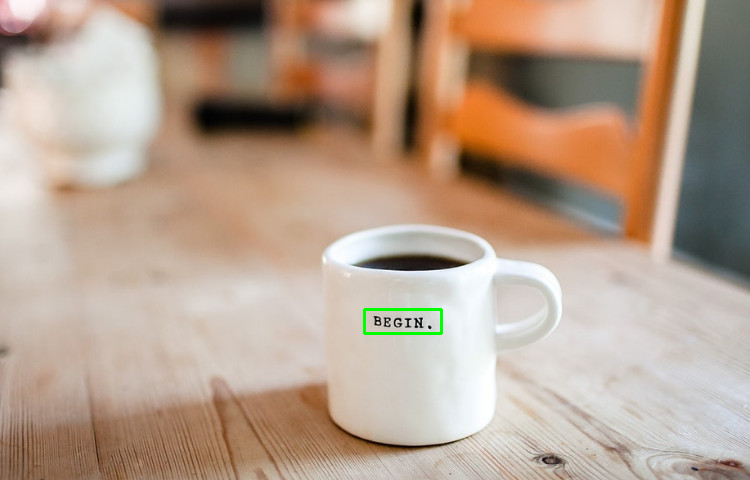

In [ ]:
margem = 3
copia = original.copy()
for (inicioX, inicioY, fimX, fimY) in deteccoes:
  inicioX = int(inicioX * proporcao_W)
  inicioY = int(inicioY * proporcao_H)
  fimX = int(fimX * proporcao_W)
  fimY = int(fimY * proporcao_H)

  roi = copia[inicioY - margem:fimY + margem, inicioX - margem:fimX + margem]
  cv2_imshow(roi)
  texto = pytesseract.image_to_string(roi, lang='por', config=config_tesseract)
  print(texto)

  cv2.rectangle(copia, (inicioX - margem, inicioY - margem), (fimX + margem, fimY + margem), (0,255,0), 2)
cv2_imshow(copia)